# **Regresores para hallar API**

### SVR y PLS

Agregando ciclo for al random state y a componentes

## **Importe Librerias**


In [50]:
#Librerias Tratamiento de datos
import pandas as pd
import numpy as np 
# import openpyxl
import sklearn
from sklearn.preprocessing import Normalizer # Normalizacion de datos


#Librerias Creacion de Modelos
from sklearn.model_selection import train_test_split #Partir datos de prueba y entrenamiento
from sklearn.preprocessing import StandardScaler    #Normalizar datos para manejar la misma escala
from sklearn.decomposition import PCA   #Algoritmo PCA
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.cross_decomposition import PLSRegression



#Librerias Metricas
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
###############################################



#Graficas
import matplotlib.pyplot as plt 
import seaborn as sns
#from mlxtend.plotting import plot_decision_regions

In [51]:
print(sklearn.__version__)  # chekear si el ambiente funciona
print(pd.__version__)

1.0.2
1.3.5


## **Tratamiento Datos**

In [52]:
#Dataset 40 muestras (Masas)
#Dataframe Supplementary_CCR_spectra
dt_Supp_spect = pd.read_csv("Data/Supplementary_CCR_spectra.csv",sep=",", decimal=",") #import dtframe

print(dt_Supp_spect.shape)#Ver tamaño dataset
print("#"*62)
print(dt_Supp_spect.dtypes) # Ver tipos de datos para preparar dataset
print("#"*62)
dt_Supp_spect.head() #print dt frame

(59692, 41)
##############################################################
Molecules\Samples     object
CR1                  float64
CR2                  float64
CR3                  float64
CR4                  float64
CR5                  float64
CR6                  float64
CR7                  float64
CR8                  float64
CR9                  float64
CR10                 float64
CR11                 float64
CR12                 float64
CR13                 float64
CR14                 float64
CR15                 float64
CR16                 float64
CR17                 float64
CR18                 float64
CR19                 float64
CR20                 float64
CR21                 float64
VR1                  float64
VR2                  float64
VR3                  float64
VR4                  float64
VR5                  float64
VR6                  float64
VR7                  float64
VR8                  float64
VR9                  float64
VR10                 float

,Molecules\Samples,CR1,CR2,CR3,CR4,CR5,CR6,CR7,CR8,CR9,...,VR10,VR11,VR12,VR13,VR14,VR15,VR16,VR17,VR18,VR19
0,C18H30,16.122,28.754,11.208,24.784,2.360,2.252,2.612,2.020,17.854,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C19H28,30.101,35.596,18.767,36.845,10.718,7.076,10.005,11.003,35.712,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C20H26,38.500,54.152,30.508,55.708,25.710,16.029,22.088,28.136,50.344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,C20H30,31.574,43.425,27.087,41.362,43.697,36.075,39.573,46.366,35.953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C21H26,52.324,62.510,40.397,57.982,37.720,24.171,25.059,41.800,63.023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
#se eliminan estos features, porque no se encuentran registrados en el target
# dt_Supp_spect.drop(['Molecules\Samples','CR3', 'CR20', 'CR21','VR3'], axis=1, inplace=True)#Eliminar muestras no disponibles en las propiedades a predecir
dt_Supp_spect.drop(['CR3', 'CR20', 'CR21','VR3'], axis=1, inplace=True)#Eliminar muestras no disponibles en las propiedades a predecir

print('shape: ',dt_Supp_spect.shape)
dt_Supp_spect.head() #print dt frame

shape:  (59692, 37)


,Molecules\Samples,CR1,CR2,CR4,CR5,CR6,CR7,CR8,CR9,CR10,...,VR10,VR11,VR12,VR13,VR14,VR15,VR16,VR17,VR18,VR19
0,C18H30,16.122,28.754,24.784,2.360,2.252,2.612,2.020,17.854,15.985,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C19H28,30.101,35.596,36.845,10.718,7.076,10.005,11.003,35.712,28.735,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C20H26,38.500,54.152,55.708,25.710,16.029,22.088,28.136,50.344,41.754,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,C20H30,31.574,43.425,41.362,43.697,36.075,39.573,46.366,35.953,30.995,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C21H26,52.324,62.510,57.982,37.720,24.171,25.059,41.800,63.023,40.590,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
#Dataframe Supplementary_CCR_spectra transpose
dt_spec_Transpose = dt_Supp_spect.transpose()
print(dt_spec_Transpose.shape)
dt_spec_Transpose.head()


(37, 59692)


,0,1,2,3,4,5,6,7,8,9,...,59682,59683,59684,59685,59686,59687,59688,59689,59690,59691
Molecules\Samples,C18H30,C19H28,C20H26,C20H30,C21H26,C21H36,C22H34,C23H40,C24H34,C26H34,...,C69H68S2,C76H12,C69H139N1,C93H31N1,C91H79N1,C72H22O1,C63H128S2,C72H143N1,C66H74O1,C88H30O1
CR1,16.122,30.101,38.5,31.574,52.324,23.838,65.693,47.62,49.053,64.986,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CR2,28.754,35.596,54.152,43.425,62.51,37.521,82.04,73.056,66.248,86.506,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CR4,24.784,36.845,55.708,41.362,57.982,27.374,82.94,60.11,67.817,79.501,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CR5,2.36,10.718,25.71,43.697,37.72,29.929,56.975,26.378,83.384,80.18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
dt_spec_Transpose.columns = dt_spec_Transpose.iloc[0]
dt_spec_Transpose = dt_spec_Transpose[1:]
dt_spec_Transpose.head()

Molecules\Samples,C18H30,C19H28,C20H26,C20H30,C21H26,C21H36,C22H34,C23H40,C24H34,C26H34,...,C69H68S2,C76H12,C69H139N1,C93H31N1,C91H79N1,C72H22O1,C63H128S2,C72H143N1,C66H74O1,C88H30O1
CR1,16.122,30.101,38.5,31.574,52.324,23.838,65.693,47.62,49.053,64.986,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CR2,28.754,35.596,54.152,43.425,62.51,37.521,82.04,73.056,66.248,86.506,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CR4,24.784,36.845,55.708,41.362,57.982,27.374,82.94,60.11,67.817,79.501,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CR5,2.36,10.718,25.71,43.697,37.72,29.929,56.975,26.378,83.384,80.18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CR6,2.252,7.076,16.029,36.075,24.171,47.137,46.952,48.978,58.504,56.834,...,0.0,1.528,1.728,1.702,1.521,1.506,2.188,0.0,0.0,0.0


In [63]:
#import target (API) 40 muestras (masas)(Crudos, Fondos/Vacios y Gases)
#Dataframe Supplementary_CCR_properties
dt_Propiedad_API = pd.read_csv('Data/Crudos_Fondos_Propiedades_NombresyEtiquetas.csv',sep=",", decimal=",") #import dtframe
print('shape: ',dt_Propiedad_API.shape)
print('#'*85)
print(dt_Propiedad_API.dtypes)
print('#'*85)
dt_Propiedad_API.head() #print dt frame


shape:  (35, 44)
#####################################################################################
Unnamed: 0      object
27020 rub       object
6607lis1        object
cdotk           object
007847pal       object
ch971           object
nut35           object
sn120           object
c801            object
0304v1          object
3049m-1041      object
29749 climon    object
48459 f1        object
4988acae1       object
0676trasg1      object
1681aull1       object
Unnamed: 16     object
CdoT43          object
0896snr31       object
33757 sfco      object
3359cu1         object
7285sf1         object
and1            object
Unnamed: 23     object
Unnamed: 24     object
Unnamed: 25     object
Unnamed: 26     object
Unnamed: 27     object
Unnamed: 28     object
Unnamed: 29     object
Unnamed: 30     object
Unnamed: 31     object
Unnamed: 32     object
Unnamed: 33     object
Unnamed: 34     object
Unnamed: 35     object
Unnamed: 36     object
Unnamed: 37     object
Unnamed: 38     object


,Unnamed: 0,27020 rub,6607lis1,cdotk,007847pal,ch971,nut35,sn120,c801,0304v1,...,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,cse
0,NaN,S1,S2,S4,NaN,S5,S6,S7,S8,S9,...,FV13,FV14,FV15,FV16,FV17,FV18,FV19,NaN,NaN,NaN
1,NaN,Rubiales,Lisama 165,Teca 62,Palagua,Chichimene 97,Nutria 35,Santos 120,Castilla 80,Vasconia-Tropomix,...,Trasgo 1,Aullador 1 DST2,Tisquirama 7,San Francisco 17,Mezcla parafínica,San Fernando,Andalucia sur 10,Tesoro 43,San Roque 3,CSE
2,NaN,200789673,200826607,200866254,201010735,200820720,200825159,200825157,200823420,200798220,...,200817187,200898545,200873436,#REF!,#REF!,200939838,200885472,#REF!,200885486,NaN
3,NaN,CRUDO,CRUDO,CRUDO*,CRUDO,CRUDO,CRUDO,CRUDO,CRUDO*,CRUDO,...,FON,FON,FON,FON,FON,FON,FON,FON,FON,NaN
4,ANALISIS,°C,°C,°C,°C,°C,°C,°C,°C,°C,...,530+,530+,530.+,545+,521.5+,533+,539+,548+,512.2+,NaN


In [64]:
dt_Propiedad_API.columns = dt_Propiedad_API.iloc[0]
dt_Propiedad_API = dt_Propiedad_API[1:]
dt_Propiedad_API.head()

,NaN,S1,S2,S4,NaN,S5,S6,S7,S8,S9,...,FV13,FV14,FV15,FV16,FV17,FV18,FV19,NaN,NaN,NaN
1,NaN,Rubiales,Lisama 165,Teca 62,Palagua,Chichimene 97,Nutria 35,Santos 120,Castilla 80,Vasconia-Tropomix,...,Trasgo 1,Aullador 1 DST2,Tisquirama 7,San Francisco 17,Mezcla parafínica,San Fernando,Andalucia sur 10,Tesoro 43,San Roque 3,CSE
2,NaN,200789673,200826607,200866254,201010735,200820720,200825159,200825157,200823420,200798220,...,200817187,200898545,200873436,#REF!,#REF!,200939838,200885472,#REF!,200885486,NaN
3,NaN,CRUDO,CRUDO,CRUDO*,CRUDO,CRUDO,CRUDO,CRUDO,CRUDO*,CRUDO,...,FON,FON,FON,FON,FON,FON,FON,FON,FON,NaN
4,ANALISIS,°C,°C,°C,°C,°C,°C,°C,°C,°C,...,530+,530+,530.+,545+,521.5+,533+,539+,548+,512.2+,NaN
5,NaN,°F,°F,°F,°F,°F,°F,°F,°F,°F,...,987+,986+,986,1013+,970.7+,991.4+,1002+,1018.4+,954.0+,NaN


In [65]:
dt_Propiedad_API.drop(dt_Propiedad_API.loc[0:5].index, inplace=True)
dt_Propiedad_API.drop(dt_Propiedad_API.loc[7:34].index, inplace=True)

In [66]:
print(dt_Propiedad_API.shape)
dt_Propiedad_API

(1, 44)


,NaN,S1,S2,S4,NaN,S5,S6,S7,S8,S9,...,FV13,FV14,FV15,FV16,FV17,FV18,FV19,NaN,NaN,NaN
6,API 15.6°C (60°F),13.3,21.1,12.1,15.5,9.4,29.7,25.3,12.5,23.1,...,1.9,8.5,8.3,6.2,7.0,1.8,4.9,11.8,9.9,13.6


In [67]:
dt_Propiedad_API=dt_Propiedad_API.transpose()

In [68]:
dt_Propiedad_API = dt_Propiedad_API.drop(dt_Propiedad_API.index[[0,4,11,17,18,41,42,43]])
print(dt_Propiedad_API.shape)
dt_Propiedad_API

(36, 1)


,6
0,
S1,13.3
S2,21.1
S4,12.1
S5,9.4
S6,29.7
S7,25.3
S8,12.5
S9,23.1
S10,20.0


In [69]:
dt_Propiedad_API[6]['FV5'] = 0.9
dt_Propiedad_API

,6
0,
S1,13.3
S2,21.1
S4,12.1
S5,9.4
S6,29.7
S7,25.3
S8,12.5
S9,23.1
S10,20.0


# **Aplicacion Modelos ML**


In [70]:
#Definimos las moleculas como Features
dt_features= dt_spec_Transpose.to_numpy().astype(float)  #Variables predictoras
#Definimos API% como Target
dt_target=dt_Propiedad_API[6].to_numpy().astype(float)  #Variable Objetivo
#Normalizacion de datos
dt_features = Normalizer().fit_transform(dt_features) #Normalizar datos
###################################################
print(dt_features.shape)
print(dt_target.shape)

(36, 59692)
(36,)


In [71]:
# Creación del modelo SVR
# ==============================================================================
modeloSVR = SVR(C = 50, kernel = 'poly', degree=2)
modeloPLS = PLSRegression(n_components=2)

In [72]:
# X_train, X_test, y_train, y_test= train_test_split(dt_features, dt_target, train_size= 0.8,random_state = i ,shuffle = True) #parametro random state permite que siempre su usen las mismas muestras


In [73]:
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

In [74]:
bestErrorSVR=[]
bestErrorPLS=[]
bestR2SVR=[]
bestR2PLS=[]
for i in range (1,1024):
    X_train, X_test, y_train, y_test= train_test_split(dt_features, dt_target, train_size= 0.8,random_state = i ,shuffle = True) #parametro random state permite que siempre su usen las mismas muestras
    #Fit models
    modeloSVR.fit(X_train, y_train)
    modeloPLS.fit(X_train, y_train)
    
    #Predict Models
    prediccionesSVR = modeloSVR.predict(X_test)
    prediccionesPLS = modeloPLS.predict(X_test)
    
    #Error medio Cuadrado - Valor ideal 0
    MSE_SVR = mean_squared_error(y_test, prediccionesSVR)
    MSE_PLS = mean_squared_error(y_test, prediccionesPLS)
    
    #Agregar Valores a la matriz
    bestErrorSVR.append(MSE_SVR) # Valor ideal 0
    bestErrorPLS.append(MSE_PLS) #Valor ideal 0
    
    #Error R2 - Valor ideal 1
    r2SVR= r2_score(y_test, prediccionesSVR)#Valor ideal 1
    r2PLS= r2_score(y_test, prediccionesPLS)#Valor ideal 1
    
    #Agregar valores a la matriz
    bestR2SVR.append(r2SVR)
    bestR2PLS.append(r2PLS)

In [75]:
print(len(bestErrorSVR))# 1023 datos en el vector para evidenciar correcto funcionamiento

1023


In [76]:
print('SVR: El mejor MSE esta un random state de ',np.argmin(bestErrorSVR), 'y su valor es ' ,np.min(bestErrorSVR))#
print('PLS: El mejor MSE esta un random state de ',np.argmin(bestErrorPLS), 'y su valor es ' ,np.min(bestErrorPLS))#
print('#'*82)

print('SVR: El mejor R2 esta un random state de ',np.argmax(bestR2SVR), 'y su valor es ' ,np.max(bestR2SVR))#
print('PLS: El mejor R2 esta un random state de ',np.argmax(bestR2PLS), 'y su valor es ' ,np.max(bestR2PLS))#



SVR: El mejor MSE esta un random state de  360 y su valor es  8.709317935600248
PLS: El mejor MSE esta un random state de  361 y su valor es  12.579196525887035
##################################################################################
SVR: El mejor R2 esta un random state de  272 y su valor es  0.891513758823843
PLS: El mejor R2 esta un random state de  55 y su valor es  0.7952339860022751


In [77]:
#partir conjunto de entrenamiento

#Entrenamiento con el mejor MSE
X_train, X_test, y_train, y_test= train_test_split(dt_features, dt_target, train_size= 0.8,random_state =np.argmax(bestR2SVR)+1 , shuffle = True) #parametro random state permite que siempre su usen las mismas muestras

# ============================================================
modeloSVR.fit(X_train, y_train)
modeloPLS.fit(X_train, y_train)

# ============================================================
prediccionesSVR_train = modeloSVR.predict(X_train)
prediccionesPLS_train = modeloPLS.predict(X_train)

#============================================================
prediccionesSVR = modeloSVR.predict(X_test)
prediccionesPLS = modeloPLS.predict(X_test)

#=====================================================
#Error medio Cuadrado - Valor ideal 0
from sklearn.metrics import mean_squared_error
MSE_SVR = mean_squared_error(y_test, prediccionesSVR)
MSE_LPS = mean_squared_error(y_test, prediccionesPLS)

print('ErrorMedioCuadrado SVR= ', MSE_SVR)
print('ErrorMedioCuadrado PLS= ', MSE_LPS)

#====================================================
#Error R2 - Valor ideal 1
from sklearn.metrics import r2_score

r2SVR= r2_score(y_test, prediccionesSVR)
r2PLS= r2_score(y_test, prediccionesPLS)

print('r2error SVR= ', r2SVR)
print('r2error PLS= ', r2PLS)



ErrorMedioCuadrado SVR=  12.163189194092606
ErrorMedioCuadrado PLS=  66.88725628161156
r2error SVR=  0.891513758823843
r2error PLS=  0.4034174014079641


In [78]:
print(type(prediccionesPLS), prediccionesPLS.shape)
print(type(X_train), X_train.shape)
print(type(y_train), y_train.shape)
print(type(X_test), X_test.shape)
print(type(y_test), y_test.shape)
print(type(dt_features) , dt_features.shape)
# dt_spec_Transpose

<class 'numpy.ndarray'> (8, 1)
<class 'numpy.ndarray'> (28, 59692)
<class 'numpy.ndarray'> (28,)
<class 'numpy.ndarray'> (8, 59692)
<class 'numpy.ndarray'> (8,)
<class 'numpy.ndarray'> (36, 59692)


## Graficas

In [79]:
#partir conjunto de entrenamiento

#Entrenamiento con el mejor MSE
X_train, X_test, y_train, y_test= train_test_split(dt_features, dt_target, train_size= 0.8,random_state =np.argmin(bestErrorSVR)+1 , shuffle = True) #parametro random state permite que siempre su usen las mismas muestras

# ============================================================
modeloSVR.fit(X_train, y_train)
modeloPLS.fit(X_train, y_train)

# ============================================================
prediccionesSVR_train = modeloSVR.predict(X_train)
prediccionesPLS_train = modeloPLS.predict(X_train)

#============================================================
prediccionesSVR = modeloSVR.predict(X_test)
prediccionesPLS = modeloPLS.predict(X_test)

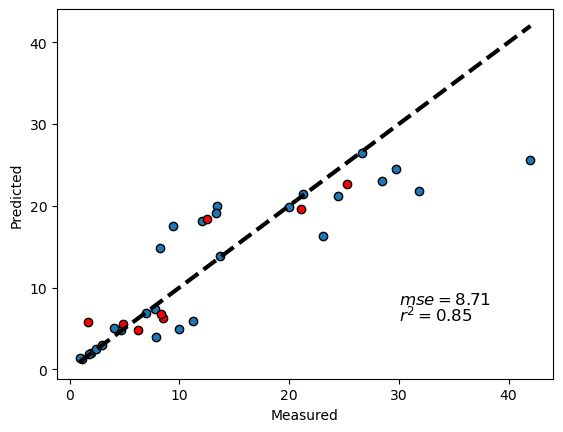

ErrorMedioCuadrado SVR=  8.709317935600248
r2error SVR=  0.8514398098400007


In [80]:
#Grafico Resultados SVR
y_pred=prediccionesSVR_train
y_pred_test=prediccionesSVR
#=================================================
MSE_SVR = mean_squared_error(y_test, prediccionesSVR)
r2SVR= r2_score(y_test, prediccionesSVR)
#=================================================
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.scatter(y_test, y_pred_test, color='red', edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.text(30,8, r"$mse = "+str(round(MSE_SVR, 2))+r"$", fontsize=12, color="black")
ax.text(30,6, r"$r^2 = "+str(round(r2SVR, 2))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

#=================================================
print('ErrorMedioCuadrado SVR= ', MSE_SVR)
print('r2error SVR= ', r2SVR)


In [81]:
#partir conjunto de entrenamiento

#Entrenamiento con el mejor R2
X_train, X_test, y_train, y_test= train_test_split(dt_features, dt_target, train_size= 0.8,random_state =np.argmax(bestR2SVR)+1 , shuffle = True) #parametro random state permite que siempre su usen las mismas muestras

# ============================================================
modeloSVR.fit(X_train, y_train)
modeloPLS.fit(X_train, y_train)

# ============================================================
prediccionesSVR_train = modeloSVR.predict(X_train)
prediccionesPLS_train = modeloPLS.predict(X_train)

#============================================================
prediccionesSVR = modeloSVR.predict(X_test)
prediccionesPLS = modeloPLS.predict(X_test)

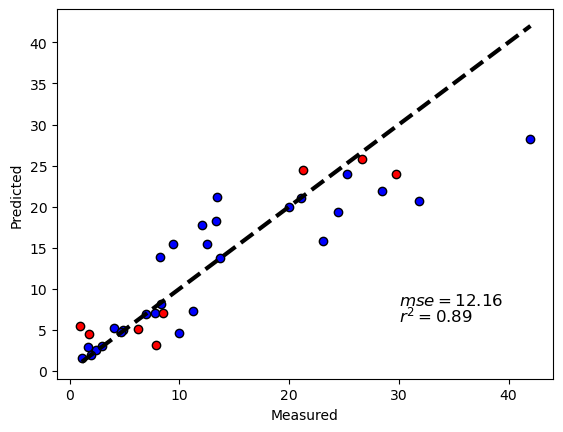

In [82]:
# Grafico Resultados PLS
y_pred=prediccionesSVR_train
y_pred_test=prediccionesSVR

#=================================================
MSE_SVR = mean_squared_error(y_test, prediccionesSVR)
r2SVR= r2_score(y_test, prediccionesSVR)
#=================================================

fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, color='blue',edgecolors=(0, 0, 0))
ax.scatter(y_test, y_pred_test, color='red', edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.text(30,8, r"$mse = "+str(round(MSE_SVR, 2))+r"$", fontsize=12, color="black")
ax.text(30,6, r"$r^2 = "+str(round(r2SVR, 2))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [156]:
#Predecir en datos nuevos 

In [157]:
datos_prueba = pd.read_csv("Data/DatosPrueba.csv", sep="\t", decimal=",")
datos_prueba.head()

,CR1
0,16.122
1,30.101
2,38.500
3,31.574
4,52.324


In [158]:
datos_prueba = datos_prueba.transpose()


In [159]:
datos_prueba

,0,1,2,3,4,5,6,7,8,9,...,59682,59683,59684,59685,59686,59687,59688,59689,59690,59691
CR1,16.122,30.101,38.5,31.574,52.324,23.838,65.693,47.62,49.053,64.986,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [160]:
predicciones = modeloSVR.predict(datos_prueba)
print(predicciones)

[3471402.71287922]
